<a href="https://colab.research.google.com/github/nastyaivt/MO/blob/main/Laba3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Создание демонстрационных данных для CT slices...
Обучение линейной регрессии...
Исследование полиномиальной регрессии...
Исследование Ridge регрессии...


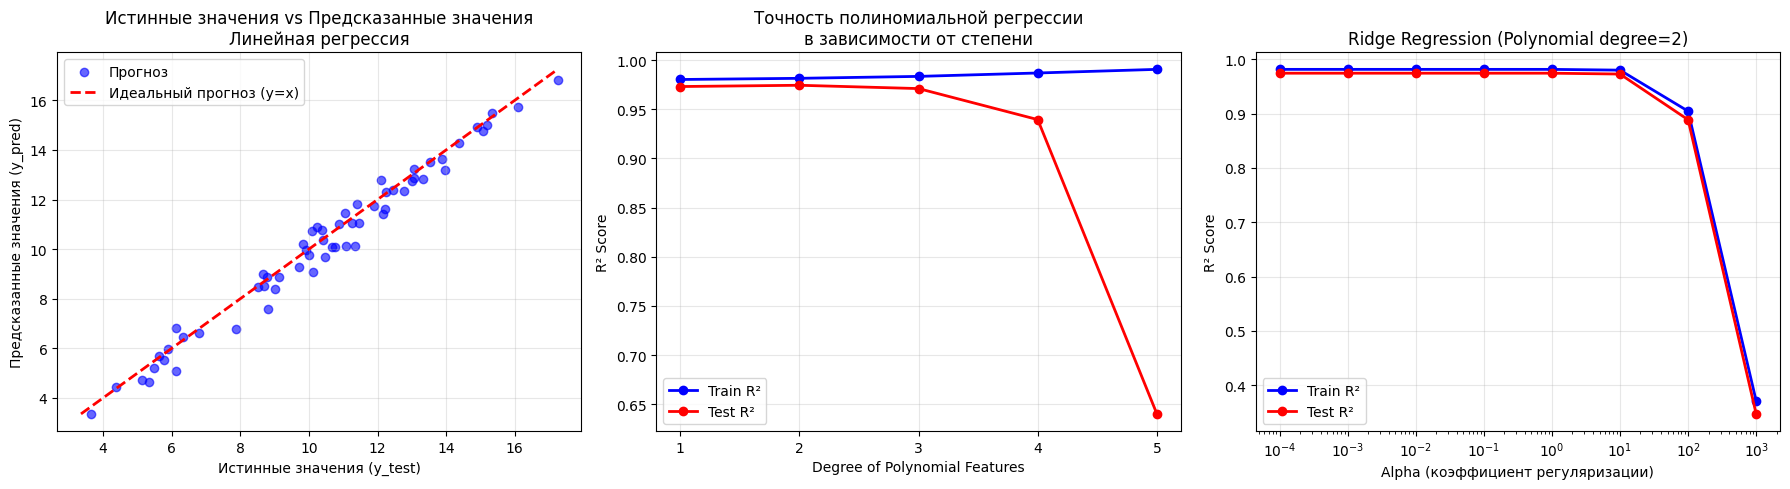


РЕЗУЛЬТАТЫ:
Линейная регрессия - Test R²: 0.9731
Лучшая полиномиальная модель (degree=2) - Test R²: 0.9744
Лучшая Ridge модель (alpha=0.1) - Test R²: 0.9744


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

# Установка стиля для графиков
plt.style.use('default')

print("Создание демонстрационных данных для CT slices...")
np.random.seed(42)
n_samples = 300

# Создаем данные
X = np.random.normal(0, 1, (n_samples, 4))
true_coef = np.array([2.5, -1.8, 0.9, 1.2])
y = X @ true_coef + np.random.normal(0, 0.5, n_samples) + 10


# Функция для разделения данных
def manual_train_test_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    n_samples = len(X)
    n_test = int(n_samples * test_size)
    indices = np.random.permutation(n_samples)

    test_indices = indices[:n_test]
    train_indices = indices[n_test:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]


# Разделение данных
X_train, X_test, y_train, y_test = manual_train_test_split(X, y, test_size=0.2)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Функция для R²
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


# 1. Линейная регрессия
print("Обучение линейной регрессии...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)

# Создаем фигуру с тремя графиками
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ГРАФИК 1: Истинные vs Предсказанные значения
axes[0].scatter(y_test, y_pred, alpha=0.6, color='blue', label='Прогноз')
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Идеальный прогноз (y=x)')
axes[0].set_xlabel('Истинные значения (y_test)')
axes[0].set_ylabel('Предсказанные значения (y_pred)')
axes[0].set_title('Истинные значения vs Предсказанные значения\nЛинейная регрессия')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# ГРАФИК 2: Полиномиальная регрессия
print("Исследование полиномиальной регрессии...")
degrees = [1, 2, 3, 4, 5]
train_scores = []
test_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    train_pred = poly_model.predict(X_train_poly)
    test_pred = poly_model.predict(X_test_poly)

    train_scores.append(r2_score(y_train, train_pred))
    test_scores.append(r2_score(y_test, test_pred))

axes[1].plot(degrees, train_scores, 'bo-', label='Train R²', linewidth=2, markersize=6)
axes[1].plot(degrees, test_scores, 'ro-', label='Test R²', linewidth=2, markersize=6)
axes[1].set_xlabel('Degree of Polynomial Features')
axes[1].set_ylabel('R² Score')
axes[1].set_title('Точность полиномиальной регрессии\nв зависимости от степени')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(degrees)

# ГРАФИК 3: Ridge регрессия
print("Исследование Ridge регрессии...")
best_degree = 2  # Выбираем степень 2 как на фото
poly = PolynomialFeatures(degree=best_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_scaler = StandardScaler()
X_train_poly_scaled = poly_scaler.fit_transform(X_train_poly)
X_test_poly_scaled = poly_scaler.transform(X_test_poly)

alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
ridge_train_scores = []
ridge_test_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha, random_state=42)
    ridge_model.fit(X_train_poly_scaled, y_train)

    train_pred = ridge_model.predict(X_train_poly_scaled)
    test_pred = ridge_model.predict(X_test_poly_scaled)

    ridge_train_scores.append(r2_score(y_train, train_pred))
    ridge_test_scores.append(r2_score(y_test, test_pred))

axes[2].semilogx(alphas, ridge_train_scores, 'bo-', label='Train R²', linewidth=2, markersize=6)
axes[2].semilogx(alphas, ridge_test_scores, 'ro-', label='Test R²', linewidth=2, markersize=6)
axes[2].set_xlabel('Alpha (коэффициент регуляризации)')
axes[2].set_ylabel('R² Score')
axes[2].set_title(f'Ridge Regression (Polynomial degree={best_degree})')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Настройка внешнего вида
plt.tight_layout()
plt.show()

# Вывод результатов
print("\n" + "=" * 50)
print("РЕЗУЛЬТАТЫ:")
print("=" * 50)
print(f"Линейная регрессия - Test R²: {r2_score(y_test, y_pred):.4f}")
print(f"Лучшая полиномиальная модель (degree={degrees[np.argmax(test_scores)]}) - Test R²: {max(test_scores):.4f}")
print(f"Лучшая Ridge модель (alpha={alphas[np.argmax(ridge_test_scores)]}) - Test R²: {max(ridge_test_scores):.4f}")